# MachineLearning: Ensembles: GB vs XGB

#### Illustration: GradientBoostingClassifier vs XGBClassifier: compare: time and accuracy

In [1]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [2]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.9368

In [3]:
from time import time

times_xgb = []
acc_xgb = []
times_sklearn = []
acc_sklearn = []
n_samples_ = [10, 100, 1000, 10000]

from sklearn.ensemble import GradientBoostingClassifier

for n_samples in n_samples_:
    print(n_samples)
    # both do 100 trees, 0.1 learning rate by default
    xgb = XGBClassifier()
    tick = time()
    xgb.fit(X_train[:n_samples], y_train[:n_samples])
    times_xgb.append(time() - tick)
    acc_xgb.append(xgb.score(X_test, y_test))
    
    gbrt = GradientBoostingClassifier()
    tick = time()
    gbrt.fit(X_train[:n_samples], y_train[:n_samples])
    times_sklearn.append(time() - tick)
    acc_sklearn.append(gbrt.score(X_test, y_test))

10
100
1000
10000


In [4]:
from time import time
times_xgb_hist = []
acc_xgb_hist = []
n_samples_ = [10, 100, 1000, 10000]
for n_samples in n_samples_:
    print(n_samples)
    # both do 100 trees, 0.1 learning rate by default
    xgb = XGBClassifier(tree_method="hist")
    tick = time()
    xgb.fit(X_train[:n_samples], y_train[:n_samples])
    times_xgb_hist.append(time() - tick)
    acc_xgb_hist.append(xgb.score(X_test, y_test))

10
100
1000
10000


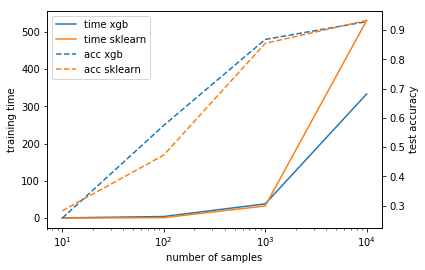

In [5]:
import matplotlib.pyplot as plt

tx, = plt.plot(n_samples_, times_xgb, label="time xgb")
tsk, = plt.plot(n_samples_, times_sklearn, label="time sklearn")
plt.ylabel("training time")
plt.xlabel("number of samples")
plt.twinx()
ax, = plt.plot(n_samples_, acc_xgb, '--', label="acc xgb")
ask, = plt.plot(n_samples_, acc_sklearn, '--', label="acc sklearn")
plt.ylabel("test accuracy")

plt.xscale("log")
plt.legend((tx, tsk, ax, ask), ('time xgb', 'time sklearn', 'acc xgb', 'acc sklearn'))
plt.savefig("images/xgboost_sklearn_bench.png")

plt.show()

* as the number of samples increases => runtime increases

XGBoost:

* similar accuracy
* faster performance